In [1]:
## Clustering: Clustering data according to similar ones

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel("./Day 5 Students files/cars.xls")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
x=df[["Price", "Mileage", "Cylinder"]]

In [7]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [8]:
model=KMeans(4)

In [9]:
model=model.fit(x)

In [10]:
guess=model.predict(x)

In [11]:
guess

array([0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 2, 3, 2, 3,
       3, 2, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,

In [12]:
x["Cluster"]=guess

In [13]:
x.head()

,Price,Mileage,Cylinder,Cluster
0,17314.103129,8221,6,0
1,17542.036083,9135,6,0
2,16218.847862,13196,6,0
3,16336.913140,16342,6,0
4,16339.170324,19832,6,3


In [14]:
silhouette_score(x, guess)

0.4132257734701292

In [15]:
import matplotlib.pyplot as plt

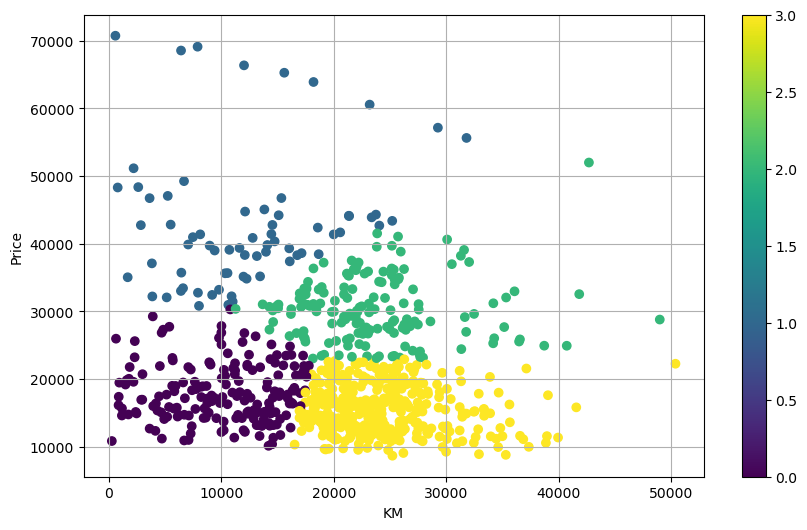

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage, x.Price, c=guess)
plt.title("")
plt.xlabel("KM")
plt.ylabel("Price")
plt.colorbar()
plt.grid()

In [17]:
#Araçlar 4 gruba ayrıldı

In [18]:
allScore=[]
allClusters=[]
distances=[]

def clustering(value):
    for i in range(1,value+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        guess=model.predict(x)
        score=silhouette_score(x,guess)
        distance=model.inertia_
        print("Cluster ",i," Score ",score)
        allScore.append(score)
        allClusters.append(i)
        distances.append(distance)
clustering(10)

Cluster  2  Score  0.4511454145208112
Cluster  3  Score  0.4132108747592501
Cluster  4  Score  0.4132257734701292
Cluster  5  Score  0.3525862015919916
Cluster  6  Score  0.3587707956907142
Cluster  7  Score  0.35882887637801325
Cluster  8  Score  0.3674669306891981
Cluster  9  Score  0.36246600351990677
Cluster  10  Score  0.35139037667035106
Cluster  11  Score  0.3561299877195382


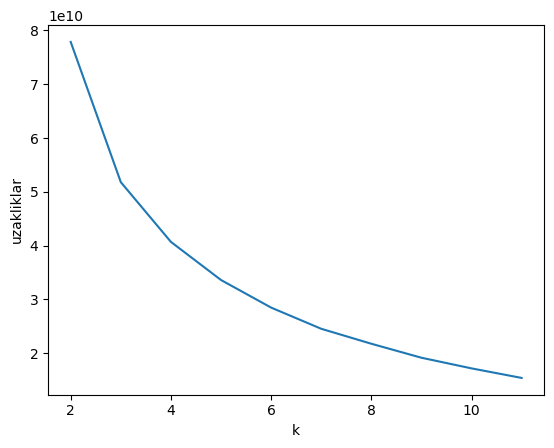

In [19]:
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allClusters,distances)

<Axes: >

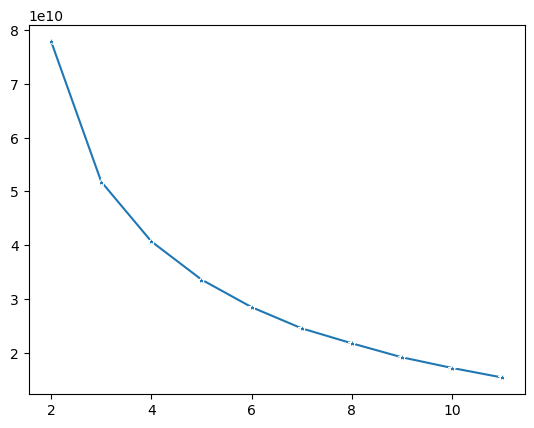

In [20]:
sns.lineplot(x=allClusters, y=distances, marker='*')

In [21]:
# pip install yellowbrick

In [22]:
from yellowbrick.cluster import KElbowVisualizer

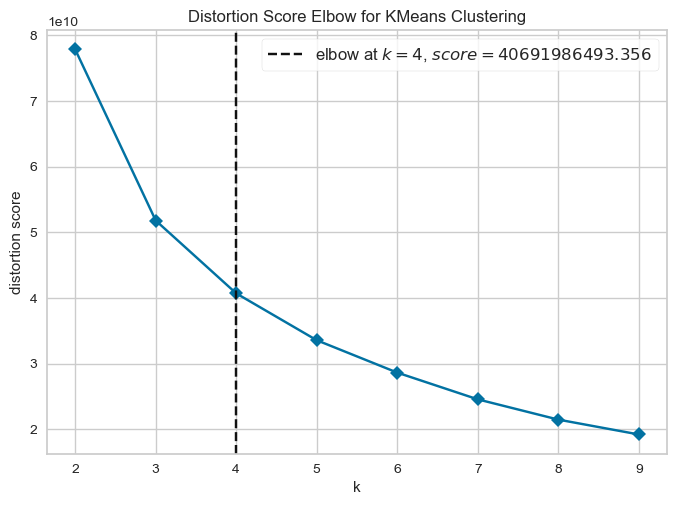

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(x)  
visualizer.show()

In [24]:
# Hierarchical Clustering

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
data=linkage(x, method='ward', metric='euclidean')

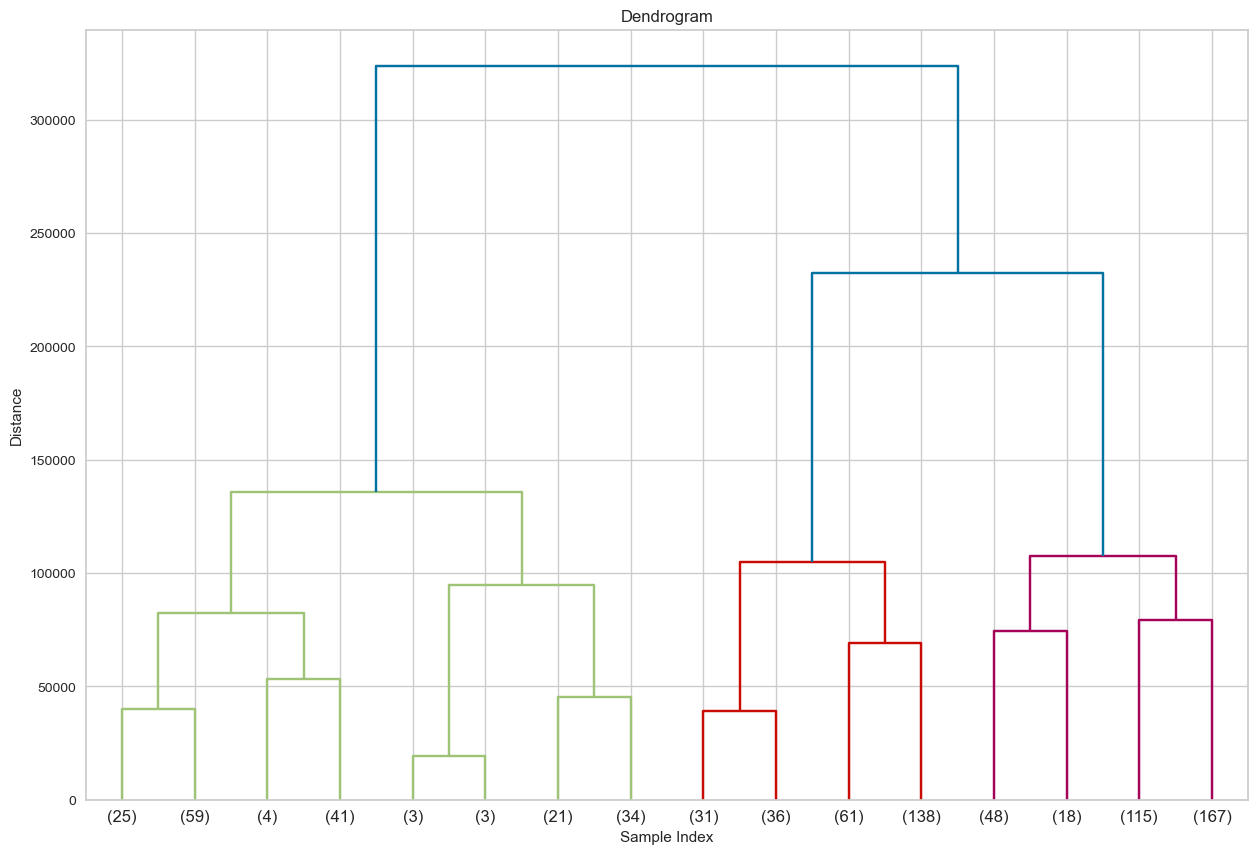

In [27]:
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))

# Dendrogram oluştur
dendrogram(data, truncate_mode='level', p=3)  # p: Kümeleme sayısı
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [28]:
# Elbow methodunun gösteriğine göre veriyi 4 farklı kümede toplamanın en ideal olduğunu düşünüyoruz Kırılma noktası 4
# Ucuz ve üzerine az km olan
# Ucuz üzerine çok km olan
# Pahalı ama az km olanlar

In [29]:
df[df["Price"]>60000] #fiyatı 60 bin $ olan araçlar

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
150,70755.466717,583,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
151,68566.187189,6420,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
152,69133.731722,7892,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
153,66374.307040,12021,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
154,65281.481237,15600,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
155,63913.117248,18200,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1
156,60567.549093,23193,Cadillac,XLR-V8,Hardtop Conv 2D,Convertible,8,4.6,2,1,1,1


In [30]:
df=pd.read_csv("./Day 5 Students files/Billionaires.csv")

In [31]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


<Axes: xlabel='selfMade', ylabel='count'>

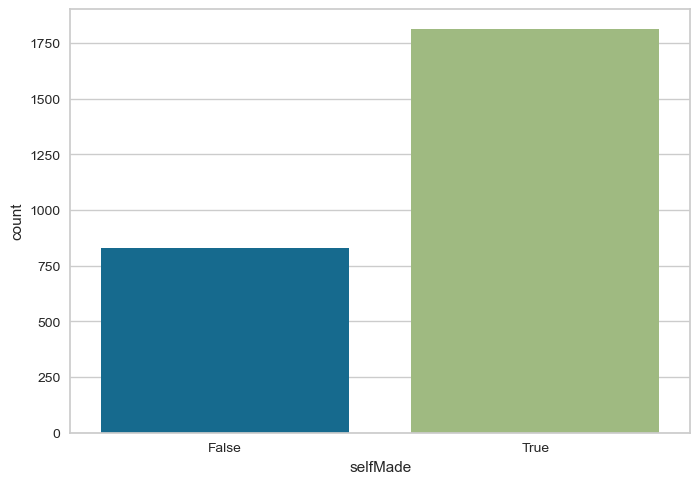

In [32]:
sns.countplot(x=df['selfMade'])

<Axes: xlabel='count', ylabel='country'>

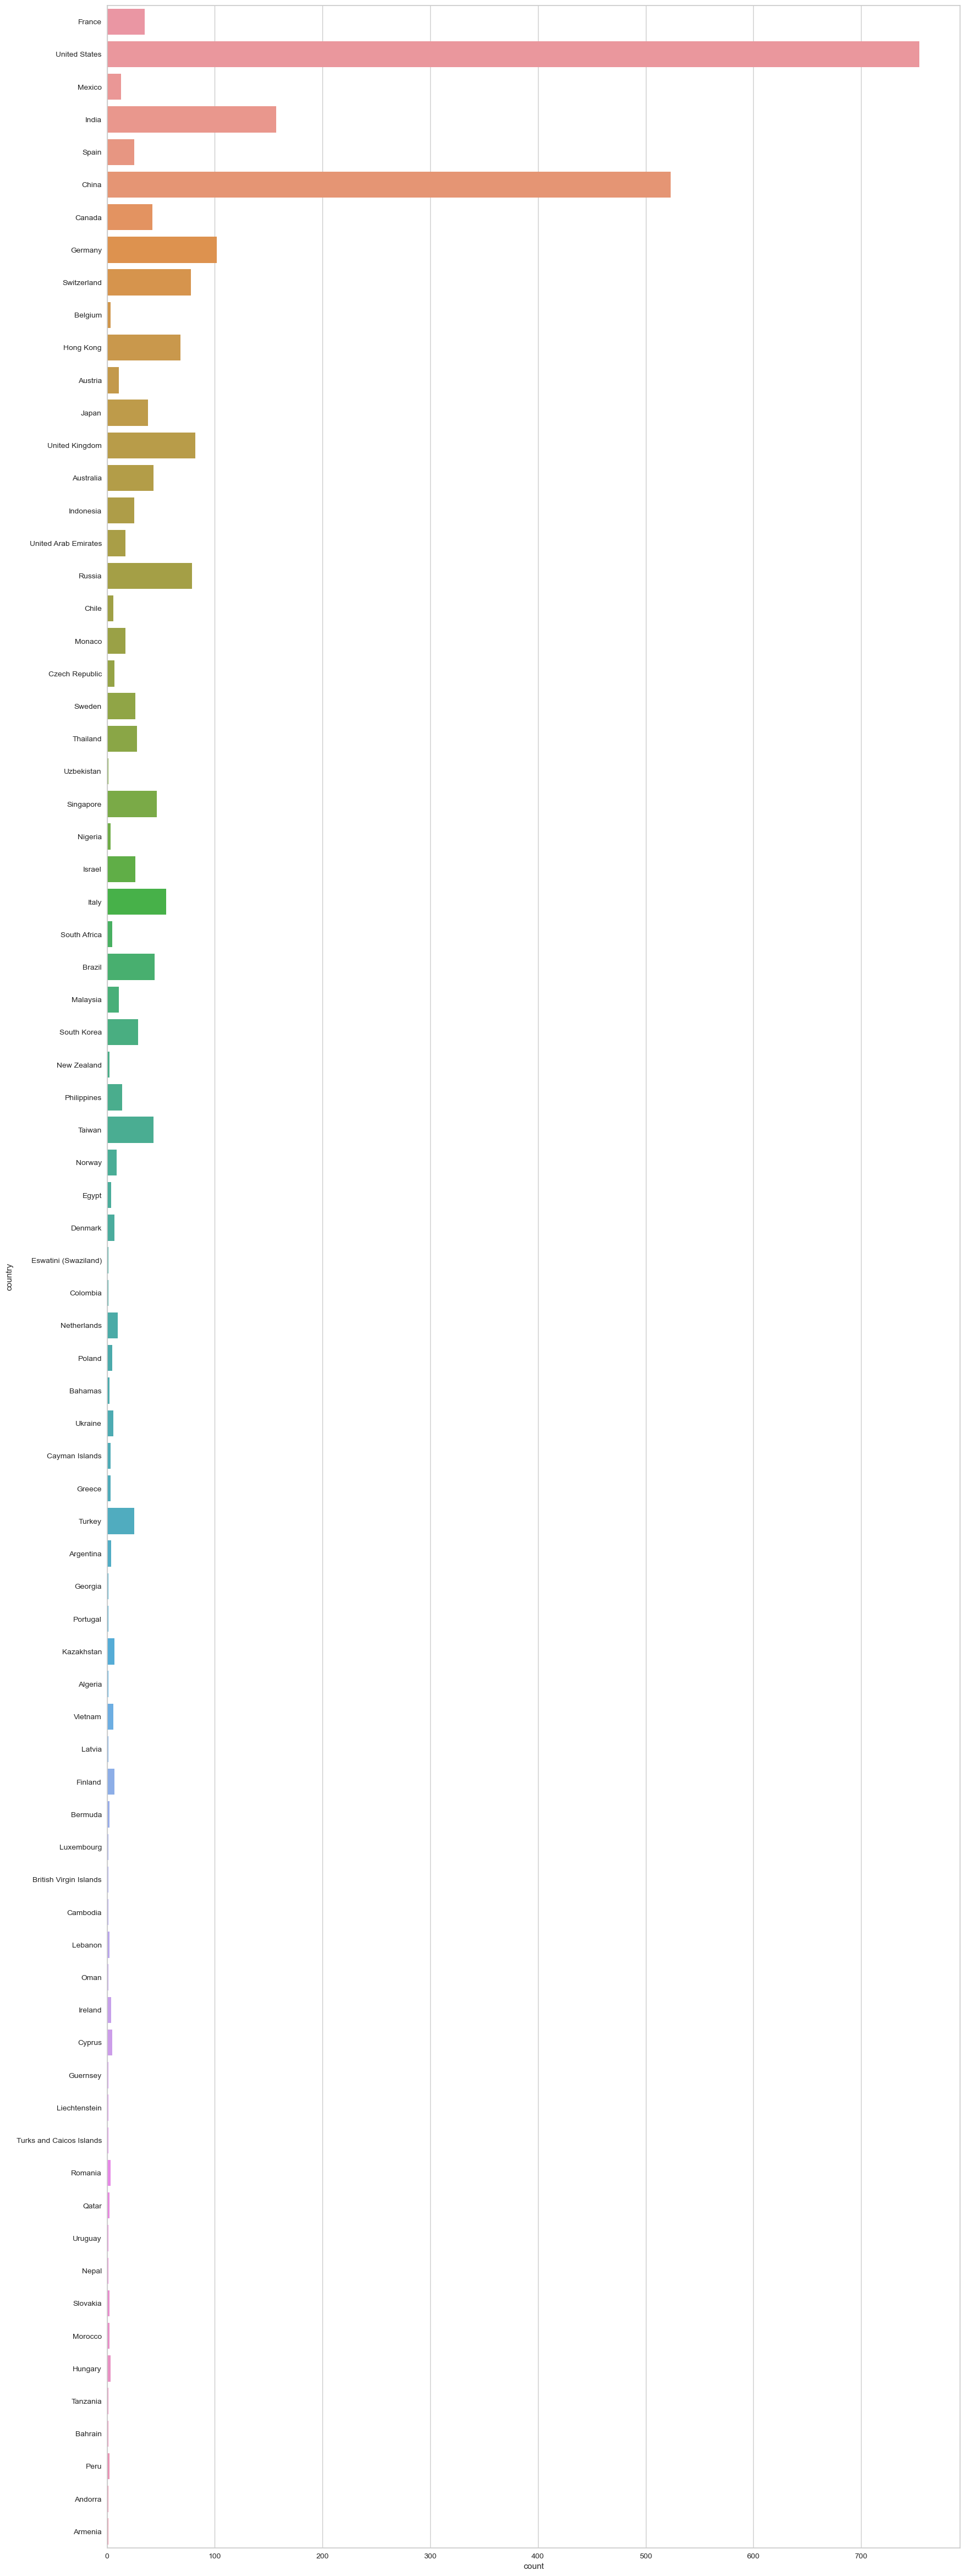

In [33]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'])

<Axes: xlabel='count', ylabel='country'>

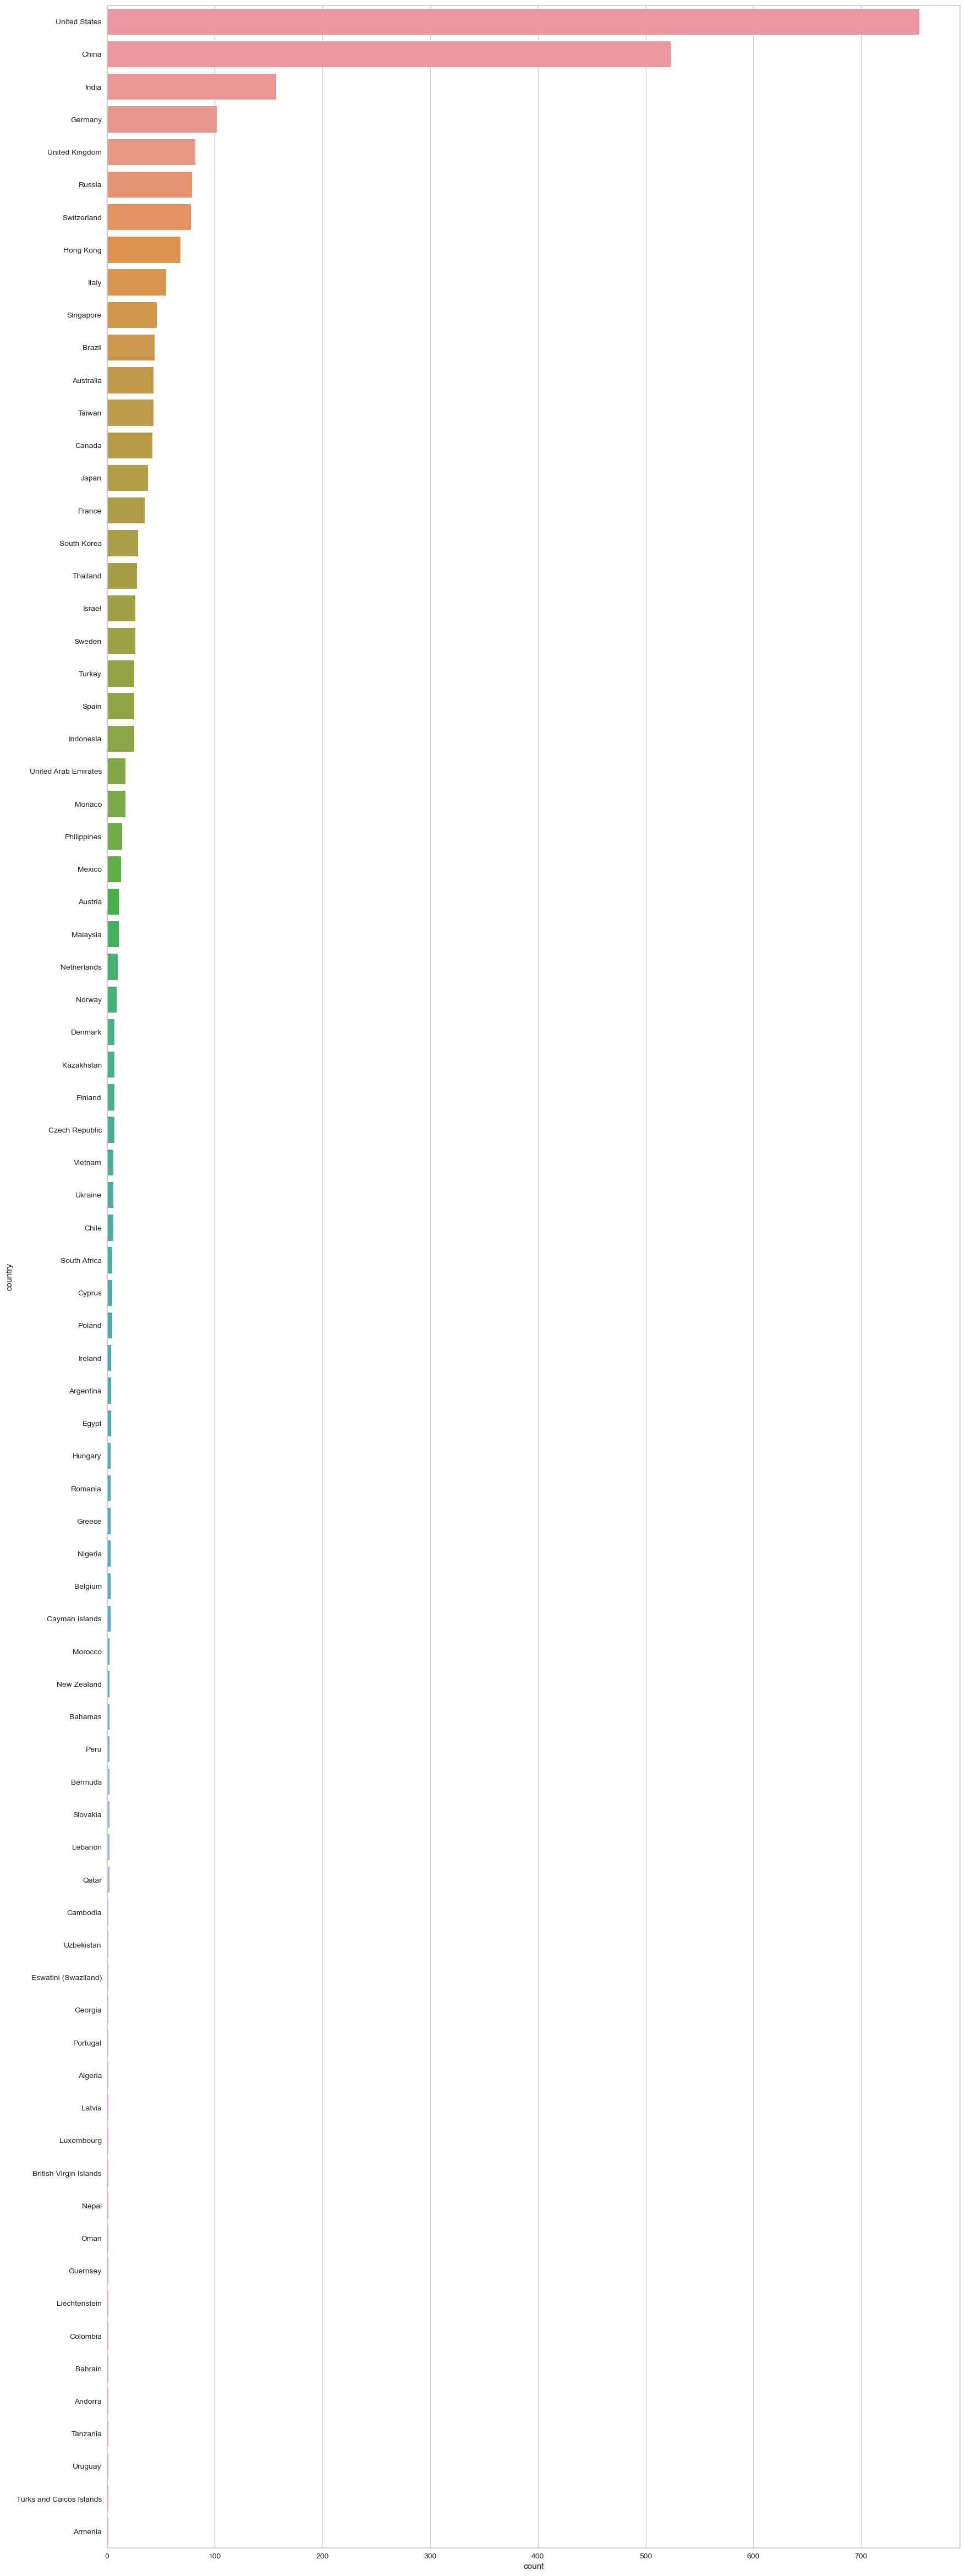

In [34]:
ydf=df['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'],order=ydf.index)

In [35]:
tr=df[df["country"]=="Turkey"]

<Axes: xlabel='selfMade', ylabel='count'>

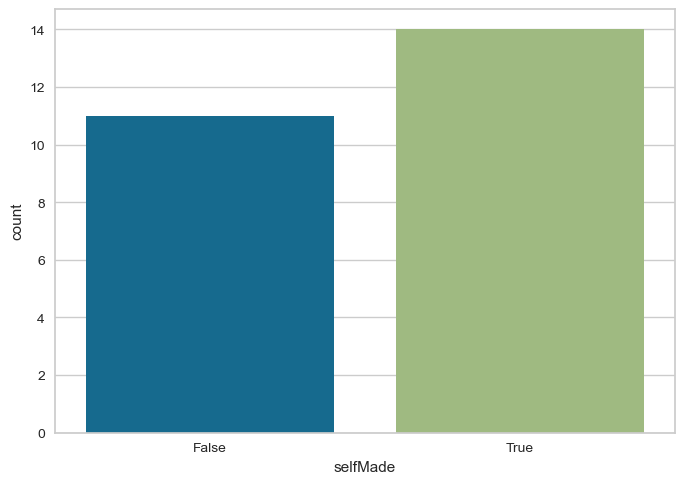

In [36]:
sns.countplot(x=tr['selfMade'])

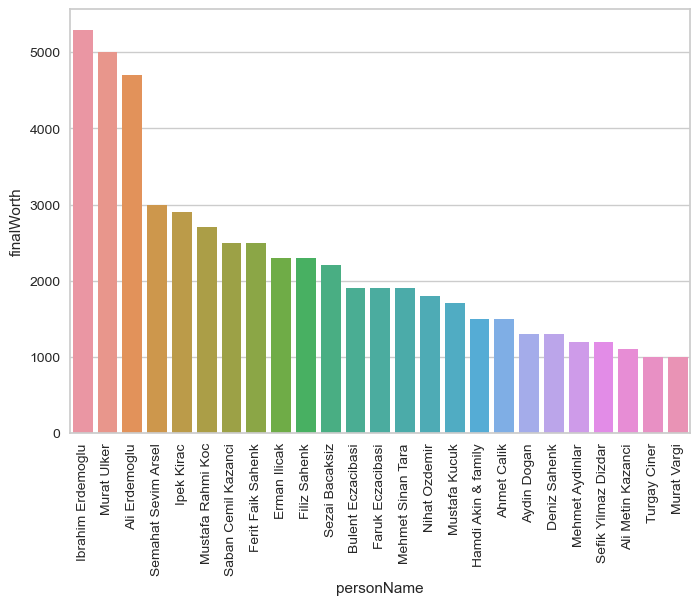

In [41]:
sns.barplot(x=tr['personName'], y=tr['finalWorth'])
plt.xticks(rotation=90);

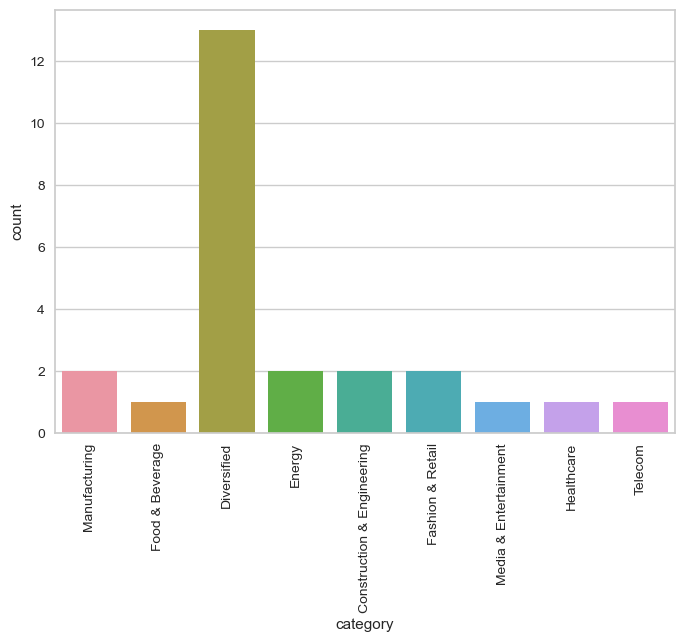

In [42]:
sns.countplot(x=tr['category'])
plt.xticks(rotation=90)
plt.show()

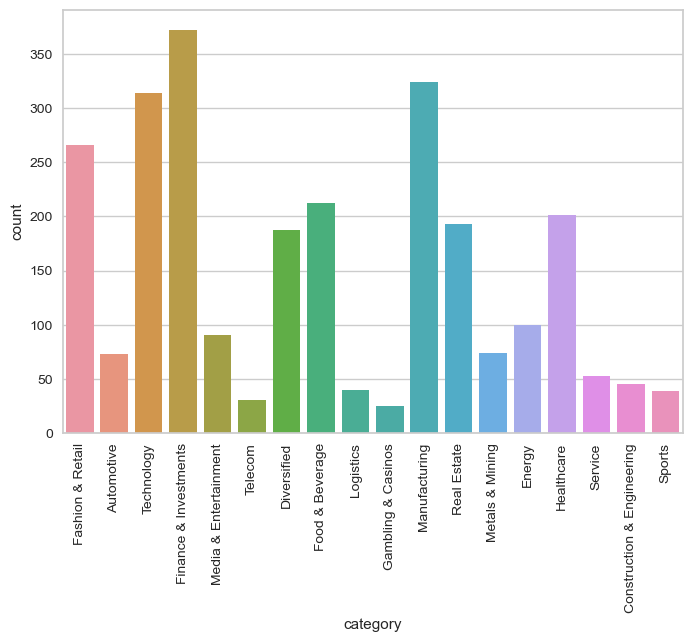

In [43]:
sns.countplot(x=df['category'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='gender', ylabel='count'>

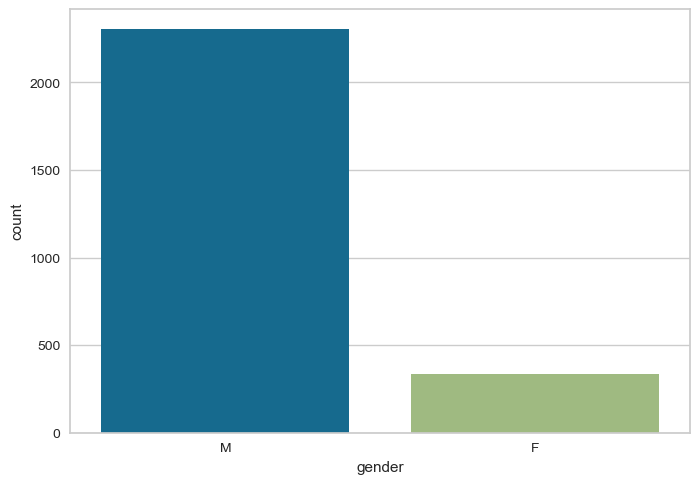

In [44]:
sns.countplot(x=df['gender'])

In [45]:
df['gender'].value_counts()

gender
M    2303
F     337
Name: count, dtype: int64

In [46]:
337/len(df)

0.12765151515151515

In [47]:
tr['gender'].value_counts()

gender
M    21
F     4
Name: count, dtype: int64